# Age Classification

In this task we use neural network to improve our results in age classification( see  task 1)

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd 

In [2]:
df = pd.read_csv('blogtext.csv')

In [3]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


delete unnecessary columns

In [5]:
df.drop(['id','date', 'sign', 'topic'], axis=1, inplace=True)

**Some stats about gender:**

In [6]:
df['gender'].describe()

count     681284
unique         2
top         male
freq      345193
Name: gender, dtype: object

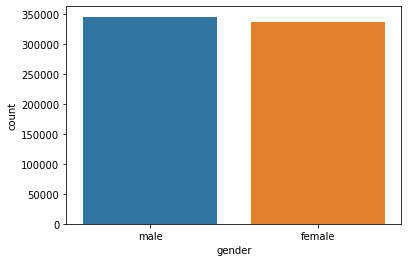

In [7]:
sns.countplot(x="gender", data=df)

**Age:**

In [8]:
df['age'].describe()

count    681284.000000
mean         23.932326
std           7.786009
min          13.000000
25%          17.000000
50%          24.000000
75%          26.000000
max          48.000000
Name: age, dtype: float64

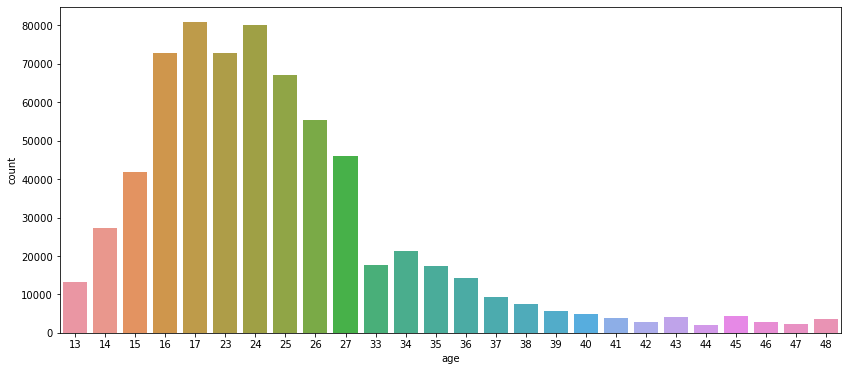

In [9]:
plt.figure(figsize = (14,6))
sns.countplot(x="age", data=df)

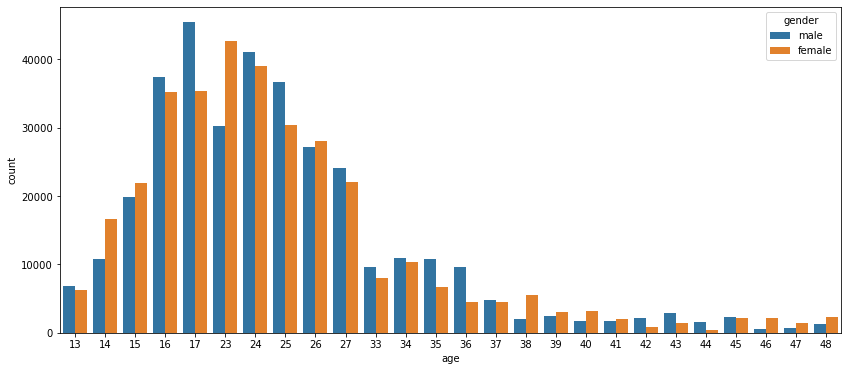

In [10]:
plt.figure(figsize = (14,6))
sns.countplot(x="age", hue="gender", data=df, )

**let's see how long text of blog posts are**

In [11]:
df['number of words'] = df['text'].apply( lambda text: len(text.split()))

In [12]:
df['number of words'].describe()

count    681284.000000
mean        200.786742
std         415.160622
min           0.000000
25%          37.000000
50%         112.000000
75%         255.000000
max      131169.000000
Name: number of words, dtype: float64

In [13]:
empty_text = len(df[df['number of words'] == 0])
print(f'number of empty texts: { empty_text }')

number of empty texts: 3119


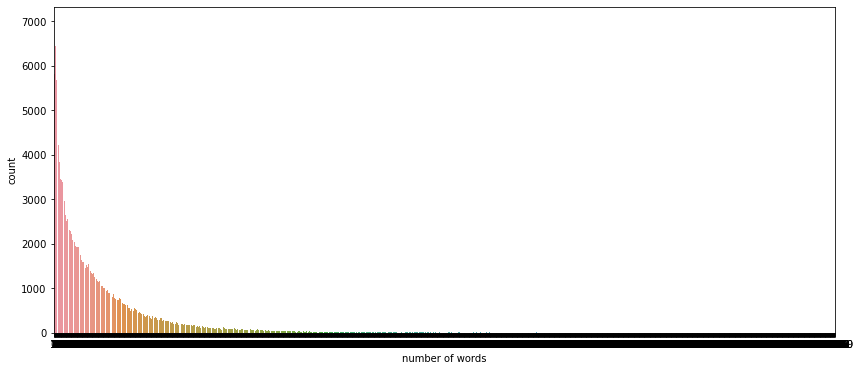

In [14]:
#df['trimmed number of words'] = df['number of words'].apply(lambda x: min(x, 1000))

plt.figure(figsize = (14,6))
sns.countplot(x="number of words", data=df, orient = 'h')

In [15]:
df['gender'] = df['gender'].apply(lambda gender: gender == 'male')

In [16]:
data, target = df.drop(['age'], axis=1), df['age']

In [17]:
data

,gender,text,number of words
0,True,"Info has been found (+/- 100 pages,...",28
1,True,These are the team members: Drewe...,20
2,True,In het kader van kernfusie op aarde...,4326
3,True,testing!!! testing!!!,2
4,True,Thanks to Yahoo!'s Toolbar I can ...,65
...,...,...,...
681279,True,"Dear Susan, I could write some really ...",40
681280,True,"Dear Susan, 'I have the second yeast i...",67
681281,True,"Dear Susan, Your 'boyfriend' is fuckin...",11
681282,True,"Dear Susan: Just to clarify, I am as...",65


One of the problems  with neural nets that often it takes a lot of time, to train NN model. So, for simplicity we will use only $ 20\%$ of our data

In [18]:
data_part = data[::5]
target_part = target[::5]

Split data on train and test

In [19]:
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data_part, target_part, test_size=0.2, random_state=42)

Now we need to prepare our data. To do that, we split out texts to words then transform all words into numbers. 
Also, we need to have fix size of text for RNN models, so we use padding’s to solve this problem. 

In [20]:
texts_train = data_train['text']
texts_test =  data_test['text']

In [21]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: tokenizer.tokenize(text.lower())

In [22]:
texts_train = [preprocess(text) for text in texts_train]
texts_test = [preprocess(text) for text in texts_test]

In [23]:
from keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()             
word_tokenizer.fit_on_texts(texts_train)         

X_train = word_tokenizer.texts_to_sequences(texts_train)
X_test =  word_tokenizer.texts_to_sequences(texts_test)

# look at first encoded data point
print(" Encoded data  example: \n")
print('X: ', X_train[0], '\n')

 Encoded data  example: 

X:  [45, 23, 695, 2, 4, 164, 292, 248, 355, 5, 28, 92, 23, 81, 18, 167, 156, 28440, 15, 740, 40, 240, 203, 136, 5962, 10, 1483, 64, 2852, 165, 4679, 1174, 23182, 15, 6532, 2, 1779, 14, 7, 196, 8, 1316, 1, 4, 19, 23, 245, 5, 97, 1407, 3870, 59, 1, 11, 19, 23, 5192, 1, 106, 38, 8697, 10209, 2, 35, 19, 3, 1550, 6235, 18, 850, 100, 7967, 389, 10, 23, 172, 1, 4, 369, 39, 106, 50, 35, 90, 1160, 734, 2, 1770, 119, 28, 59, 364, 1, 75, 1407, 1, 4, 63, 45, 40, 18949, 56, 3, 14173, 432, 567, 231, 5, 36832, 6475, 2, 22, 4, 71, 52, 63, 132, 435, 3, 296, 8, 9828, 3, 2453, 8, 167, 83, 17, 97, 20, 1743, 395, 364, 169, 1, 4, 147, 7, 700, 23673, 364, 5, 91, 2, 42, 59, 10, 3361, 1747, 2, 3416, 878, 18, 183, 3, 132, 62, 10, 502, 1] 



In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQ_LENGTH = 256

X_train = pad_sequences(X_train, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
X_test = pad_sequences(X_test, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [25]:
VOCABULARY_SIZE = np.max(X_train) + 1
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  316559


There is always the question whether or not to use pre-trained embeddings. In this work we decided to use pre-trained   fasttext embeddings but allow model to change them. 

In [26]:
import gensim.downloader 
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")
EMBEDDING_SIZE = 300

In [27]:
# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
# create a word to index dictionary mapping
word2id = word_tokenizer.word_index
# copy vectors from word2vec model to the words present in corpus
not_in_embed = []
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = embeddings[word]
    except KeyError:
        not_in_embed.append(word)
        
print("number of words which don't have embedding = ", len(not_in_embed))

number of words which don't have embedding =  197843


In [28]:
print("some words which don't have embedding: " ,not_in_embed[::10000] )

some words which don't have embedding:  ["i'm", 'mmchronic', 'scheister', 'christospective', 'yoozh', 'rockwell-esque', 'scan-tron', 'avontuurlijke', 'halooooooo', "turret's", 'exahausted', 'sub-profiles', "percy's", 'adultchildrenspeakoutaboutsamesexparents', 'niya-jina', 'thoughtsabout', 'planne', "freder's", 'soon-to-be-closed', 'calve-deep']


yeah,  as you may see there is the problem with сontraction, slangs and so on. But as we decided to tune embeddings that shouldn’t effect so much.    

In [29]:
def age_group(age):
    if age < 20:
        return 0
    elif age < 30:
        return 1
    return 2 

In [30]:
y_train_group = np.array([age_group(y) for y in y_train])
y_test_group = np.array([age_group(y) for y in y_test])

(array([37796.,     0.,     0.,     0.,     0., 51436.,     0.,     0.,
            0., 19773.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

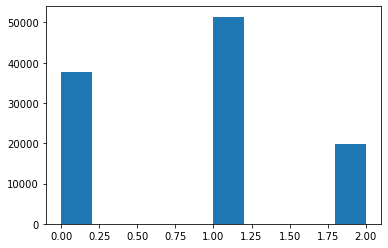

In [31]:
plt.hist(y_train_group)

In [32]:
NUM_CLASESS = 3

## CNN

Let's start our experiments with convolutional neural network. 

In [33]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

model_cnn = Sequential()
model_cnn.add(layers.Embedding(VOCABULARY_SIZE, EMBEDDING_SIZE, input_length=MAX_SEQ_LENGTH, weights = [embedding_weights]))
model_cnn.add(layers.Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(layers.GlobalMaxPooling1D())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(NUM_CLASESS, activation='softmax'))

In [34]:
model_cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 300)          94967700  
_________________________________________________________________
conv1d (Conv1D)              (None, 252, 250)          375250    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 95,375,465
Trainable params: 95,375,465
Non-trainable params: 0
_________________________________________________________________


During training we will store information about our score. It helps us to see problems with overfitting.

In [35]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [36]:
history_cnn = model_cnn.fit(X_train, 
                            y_train_group, 
                            epochs=3,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/3
767/767 [==============================] - ETA: 0s - loss: 0.8110 - accuracy: 0.6235
Epoch 00001: val_accuracy improved from -inf to 0.66801, saving model to best_model_cnn.h5
767/767 [==============================] - 3552s 5s/step - loss: 0.8110 - accuracy: 0.6235 - val_loss: 0.7339 - val_accuracy: 0.6680
Epoch 2/3
767/767 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.7817
Epoch 00002: val_accuracy improved from 0.66801 to 0.67498, saving model to best_model_cnn.h5
767/767 [==============================] - 1008s 1s/step - loss: 0.5243 - accuracy: 0.7817 - val_loss: 0.7545 - val_accuracy: 0.6750
Epoch 3/3
767/767 [==============================] - ETA: 0s - loss: 0.1804 - accuracy: 0.9365
Epoch 00003: val_accuracy did not improve from 0.67498
767/767 [==============================] - 1000s 1s/step - loss: 0.1804 - accuracy: 0.9365 - val_loss: 1.0084 - val_accuracy: 0.6687


In [64]:
model_cnn.evaluate(X_test, y_test_group, verbose=1)

852/852 [==============================] - 16s 19ms/step - loss: 1.0359 - accuracy: 0.6563


[1.0358935594558716, 0.6563187837600708]

Not bad

## LSTM

In [37]:
def create_rnn_binary_clf(rnn_layer, embedding_size = EMBEDDING_SIZE ,embedding_weights = None, train_embedding = True):
    rnn_clf = Sequential()
    
    rnn_clf.add(layers.Embedding(input_dim = VOCABULARY_SIZE, 
                                   output_dim = embedding_size, 
                                   input_length = MAX_SEQ_LENGTH, 
                                   trainable = train_embedding,   # True — update the embeddings  
                                   weights = [embedding_weights] if embedding_weights is not None else None
                                   ))
    rnn_clf.add(rnn_layer)
    rnn_clf.add(layers.Dense(NUM_CLASESS, activation='softmax'))
    rnn_clf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return rnn_clf

In [38]:

model_lstm = create_rnn_binary_clf(rnn_layer = layers.LSTM(64),  embedding_weights = embedding_weights)
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 300)          94967700  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 95,061,335
Trainable params: 95,061,335
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [40]:
history_lstm = model_lstm.fit(X_train, 
                              y_train_group, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
767/767 [==============================] - ETA: 0s - loss: 0.8762 - accuracy: 0.5972
Epoch 00001: val_accuracy improved from -inf to 0.63517, saving model to best_model_lstm.h5
767/767 [==============================] - 993s 1s/step - loss: 0.8762 - accuracy: 0.5972 - val_loss: 0.8079 - val_accuracy: 0.6352
Epoch 2/5
767/767 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.7082
Epoch 00002: val_accuracy improved from 0.63517 to 0.64609, saving model to best_model_lstm.h5
767/767 [==============================] - 958s 1s/step - loss: 0.6781 - accuracy: 0.7082 - val_loss: 0.7897 - val_accuracy: 0.6461
Epoch 3/5
767/767 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.8256
Epoch 00003: val_accuracy did not improve from 0.64609
767/767 [==============================] - 1325s 2s/step - loss: 0.4337 - accuracy: 0.8256 - val_loss: 0.9115 - val_accuracy: 0.6287
Epoch 4/5
767/767 [==============================] - ETA: 0s - loss: 0.2447 

In [41]:
def plot_train_process(history_model, title = None):
    plt.figure(figsize = (14,6))
    plt.plot(history_model.history['accuracy'], 
         label='train accuracy')
    plt.plot(history_model.history['val_accuracy'], 
             label='validation accuracy')
    plt.xlabel('epoch number')
    plt.ylabel('accuracy')
    plt.legend()
    if title is not None:
        plt.title(title)
    plt.show()

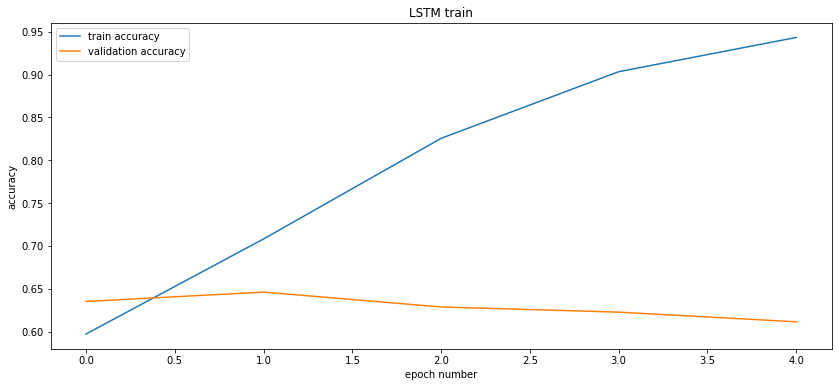

In [42]:
plot_train_process(history_lstm, "LSTM train")

So, we may see that after 2 epochs our model starts to overfitting. That is bad news.

But anyway let's look at test results.

In [43]:
model_lstm.evaluate(X_test, y_test_group, verbose=1)

852/852 [==============================] - 26s 31ms/step - loss: 1.4303 - accuracy: 0.6155


[1.430275321006775, 0.6154777407646179]

There are some ways to fix overfitting problem. Firstly, let's add regulations to RNN model. And also reduce  sell number. Why do we actually take 64 cells?

In [44]:
from keras.regularizers import L1L2

In [45]:
model_lstm_reg_save_path = 'best_model_lstm_reg.h5'
checkpoint_callback_lstm_reg = ModelCheckpoint(model_lstm_reg_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [46]:
reg = L1L2(l2 = 0.01)
model_lstm_reg = create_rnn_binary_clf(rnn_layer = layers.LSTM(16, kernel_regularizer = reg), embedding_weights = embedding_weights)
model_lstm_reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 256, 300)          94967700  
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                20288     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 94,988,039
Trainable params: 94,988,039
Non-trainable params: 0
_________________________________________________________________


In [47]:
history_lstm_reg = model_lstm_reg.fit(X_train, 
                              y_train_group, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm_reg])

Epoch 1/5
767/767 [==============================] - ETA: 0s - loss: 0.9969 - accuracy: 0.5678
Epoch 00001: val_accuracy improved from -inf to 0.61086, saving model to best_model_lstm_reg.h5
767/767 [==============================] - 971s 1s/step - loss: 0.9969 - accuracy: 0.5678 - val_loss: 0.8914 - val_accuracy: 0.6109
Epoch 2/5
767/767 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.6542
Epoch 00002: val_accuracy improved from 0.61086 to 0.63517, saving model to best_model_lstm_reg.h5
767/767 [==============================] - 983s 1s/step - loss: 0.7932 - accuracy: 0.6542 - val_loss: 0.8482 - val_accuracy: 0.6352
Epoch 3/5
767/767 [==============================] - ETA: 0s - loss: 0.6527 - accuracy: 0.7338
Epoch 00003: val_accuracy improved from 0.63517 to 0.64911, saving model to best_model_lstm_reg.h5
767/767 [==============================] - 965s 1s/step - loss: 0.6527 - accuracy: 0.7338 - val_loss: 0.8365 - val_accuracy: 0.6491
Epoch 4/5
767/767 [======

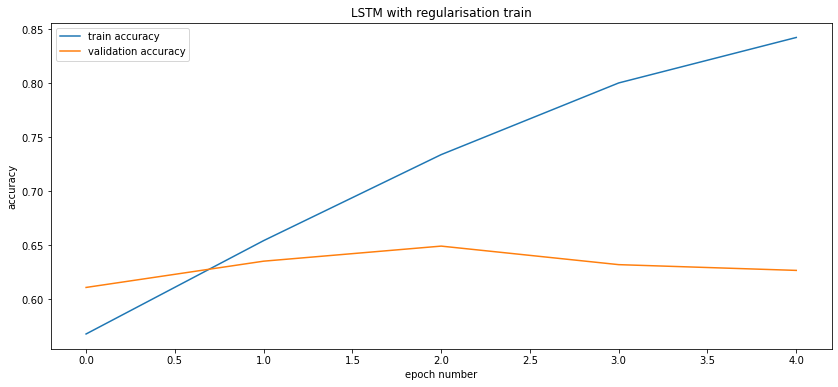

In [48]:
plot_train_process(history_lstm_reg, "LSTM with regularisation train")

In [49]:
model_lstm_reg.evaluate(X_test, y_test_group, verbose=1)

852/852 [==============================] - 21s 24ms/step - loss: 0.9828 - accuracy: 0.6180


[0.9828180074691772, 0.6180464029312134]

So, these changes didn't help us. Now overfitting is little bit less but still huge 

Another try to fix that problem. We add more regularisation , dropout and  decreased   embedding dimention. 

In [50]:
reg = L1L2(l2 = 0.1)
model_lstm_reg2 = create_rnn_binary_clf(rnn_layer = layers.LSTM(16, kernel_regularizer = reg, dropout = 0.1), embedding_size = 100)
model_lstm_reg2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 256, 100)          31655900  
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                7488      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 31,663,439
Trainable params: 31,663,439
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_lstm_reg2_save_path = 'best_model_lstm_reg2.h5'
checkpoint_callback_lstm_reg2 = ModelCheckpoint(model_lstm_reg2_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [52]:
history_lstm_reg2 = model_lstm_reg2.fit(X_train, 
                              y_train_group, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm_reg2])

Epoch 1/5
767/767 [==============================] - ETA: 0s - loss: 1.5348 - accuracy: 0.5419
Epoch 00001: val_accuracy improved from -inf to 0.58169, saving model to best_model_lstm_reg2.h5
767/767 [==============================] - 369s 481ms/step - loss: 1.5348 - accuracy: 0.5419 - val_loss: 0.9182 - val_accuracy: 0.5817
Epoch 2/5
767/767 [==============================] - ETA: 0s - loss: 0.8290 - accuracy: 0.6256
Epoch 00002: val_accuracy improved from 0.58169 to 0.63068, saving model to best_model_lstm_reg2.h5
767/767 [==============================] - 386s 503ms/step - loss: 0.8290 - accuracy: 0.6256 - val_loss: 0.8075 - val_accuracy: 0.6307
Epoch 3/5
767/767 [==============================] - ETA: 0s - loss: 0.7417 - accuracy: 0.6762
Epoch 00003: val_accuracy did not improve from 0.63068
767/767 [==============================] - 387s 505ms/step - loss: 0.7417 - accuracy: 0.6762 - val_loss: 0.8168 - val_accuracy: 0.6287
Epoch 4/5
767/767 [==============================] - ETA: 

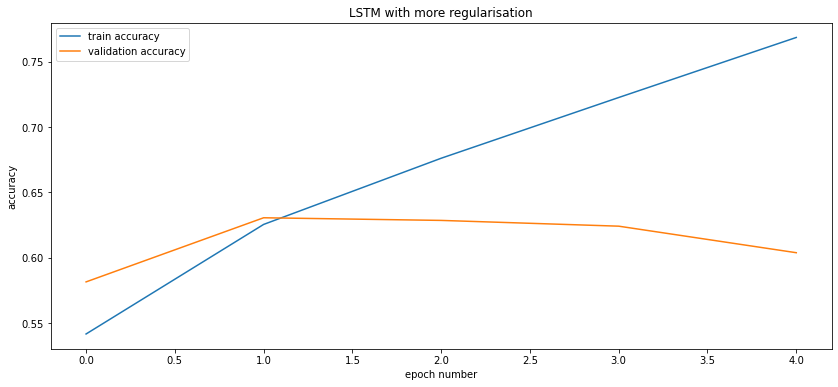

In [53]:
plot_train_process(history_lstm_reg2, "LSTM with more regularisation")

In [54]:
model_lstm_reg2.evaluate(X_test, y_test_group, verbose=1)

852/852 [==============================] - 12s 14ms/step - loss: 0.9645 - accuracy: 0.6034


[0.9644644260406494, 0.603405237197876]

This approach  give better results but we still have overfitting.

Who knows, may be GRU  can help us. At least that model has less parameters.

In [55]:
reg = L1L2(l2 = 0.1)
model_gru = create_rnn_binary_clf(rnn_layer = layers.GRU(16, kernel_regularizer = reg), embedding_size = 100)
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 256, 100)          31655900  
_________________________________________________________________
gru (GRU)                    (None, 16)                5664      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 31,661,615
Trainable params: 31,661,615
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [57]:
history_gru = model_gru.fit(X_train, 
                              y_train_group, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
767/767 [==============================] - ETA: 0s - loss: 1.4630 - accuracy: 0.5413
Epoch 00001: val_accuracy improved from -inf to 0.60261, saving model to best_model_gru.h5
767/767 [==============================] - 385s 501ms/step - loss: 1.4630 - accuracy: 0.5413 - val_loss: 0.8754 - val_accuracy: 0.6026
Epoch 2/5
767/767 [==============================] - ETA: 0s - loss: 0.8523 - accuracy: 0.6211
Epoch 00002: val_accuracy improved from 0.60261 to 0.62187, saving model to best_model_gru.h5
767/767 [==============================] - 380s 496ms/step - loss: 0.8523 - accuracy: 0.6211 - val_loss: 0.8439 - val_accuracy: 0.6219
Epoch 3/5
767/767 [==============================] - ETA: 0s - loss: 0.7737 - accuracy: 0.6642
Epoch 00003: val_accuracy improved from 0.62187 to 0.63471, saving model to best_model_gru.h5
767/767 [==============================] - 371s 483ms/step - loss: 0.7737 - accuracy: 0.6642 - val_loss: 0.8250 - val_accuracy: 0.6347
Epoch 4/5
767/767 [============

In [58]:
model_gru.evaluate(X_test, y_test_group, verbose=1)

852/852 [==============================] - 12s 14ms/step - loss: 0.9153 - accuracy: 0.6223


[0.9153419137001038, 0.62233966588974]

Unfortunately , not in this time....

At the end let's use bidirectional LSTM

In [59]:
reg = L1L2(l2 = 0.1)
model_bidirectional = create_rnn_binary_clf(layers.Bidirectional(layers.LSTM(16,kernel_regularizer = reg, dropout = 0.1 )), embedding_size = 100)
model_bidirectional.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 256, 100)          31655900  
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                14976     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 31,670,975
Trainable params: 31,670,975
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_bidirectional_save_path = 'best_model_bidirectional.h5'
checkpoint_callback_bidirectional = ModelCheckpoint(model_bidirectional_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [61]:
history_bidirectional = model_bidirectional.fit(X_train, 
                              y_train_group, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_bidirectional])

Epoch 1/5
767/767 [==============================] - ETA: 0s - loss: 2.0665 - accuracy: 0.5590
Epoch 00001: val_accuracy improved from -inf to 0.62196, saving model to best_model_bidirectional.h5
767/767 [==============================] - 413s 538ms/step - loss: 2.0665 - accuracy: 0.5590 - val_loss: 0.8392 - val_accuracy: 0.6220
Epoch 2/5
767/767 [==============================] - ETA: 0s - loss: 0.7923 - accuracy: 0.6514
Epoch 00002: val_accuracy improved from 0.62196 to 0.62811, saving model to best_model_bidirectional.h5
767/767 [==============================] - 415s 541ms/step - loss: 0.7923 - accuracy: 0.6514 - val_loss: 0.8163 - val_accuracy: 0.6281
Epoch 3/5
767/767 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.6924
Epoch 00003: val_accuracy improved from 0.62811 to 0.63380, saving model to best_model_bidirectional.h5
767/767 [==============================] - 427s 557ms/step - loss: 0.7050 - accuracy: 0.6924 - val_loss: 0.8250 - val_accuracy: 0.6338
E

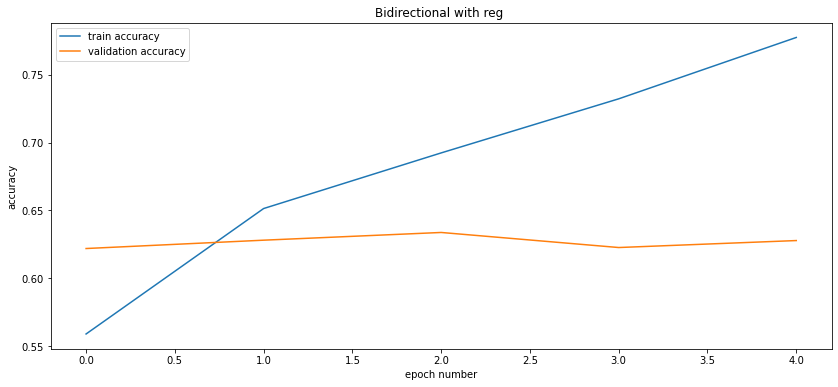

In [62]:
plot_train_process(history_bidirectional, "Bidirectional with reg ")

In [63]:
model_bidirectional.evaluate(X_test, y_test_group, verbose=1)

852/852 [==============================] - 15s 17ms/step - loss: 0.9288 - accuracy: 0.6233


[0.9287765026092529, 0.6233304142951965]

Nothing changed. 

**Conclusion**

We tried to beat results, received in task one. Unfortunately , we did not achieve better results. There are some lessons that we could learn out of it. 

1) neural nets may overfitting.

2) There are some ways to fix that but there is no guarantee  that it would help.

3) It was common knowledge, that NN requires a lot of data. So, increasing data is also a good way to decrease overfitting. 